## DSC 530 - Week 12
## FINAL PROJECT - Do immigrants displace native workers?
### Linh Huynh

In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
import pandas as pd

df = pd.read_excel('/Users/linhhuynh/Desktop/DSC530/adult-training.xlsx')
df.head()

,caseid,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.columns

Index(['caseid', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Describe what the 5 variables mean in the dataset


#### 1. age 
- Type: Numeric, Continuous
- Description: Age of the individual. This variable could help assess whether there are age-related differences in employment between immigrants and natives.

#### 2. education-num
- Type: Numeric, Continuous
- Description: The number of years of education completed by the individual. Education level is often correlated with job opportunities and income. This variable helps examine whether immigrants and natives with similar education levels have different employment outcomes.

#### 3. hours-per-week
- Type: Numeric, Continuous
- Description: The weekly hours worked by an individual. Compare the working hours between native-born and foreign-born employees.

#### 4. income
- Type: Categorical, Binary
- Description: The income level of the individual, categorized as: >50K, <=50K. This variable could help assess whether immigrants are replacing natives in higher-paying jobs or facing wage disparities, by comparing the incomes of immigrants and natives.

#### 5. native-country
- Type: Categorical, Nominal
- Description: The country of birth of the individual. This variable is crucial for distinguishing between immigrants and natives.
- Possible categories include: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#### 6. immigrant-status
- Type: Categorical, Binary
- Description: Create a binary variable (0 for native-born, 1 for foreign-born) from the native-country variable. This variable assists in comparing employment outcomes between immigrants and natives.


In [4]:
# Define a function to classify individuals as native-born or foreign-born based on their native country
def classify_immigrant_status(country):
    if country.strip() == 'United-States':
        return 0  # Native-born
    else:
        return 1  # Foreign-born
    
# Apply the function to create the immigration-status variable
df['immigrant-status'] = df['native-country'].apply(classify_immigrant_status)

# Save the modified DataFrame back to a CSV file
df.to_csv('data_with_immigrant_status.csv', index=False)

df.columns

Index(['caseid', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'immigrant-status'],
      dtype='object')

In [5]:
df.head()

,caseid,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,immigrant-status
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1


In [6]:
race = df['race'] 
df.race.value_counts().sort_index()

race
 Amer-Indian-Eskimo      311
 Asian-Pac-Islander     1039
 Black                  3124
 Other                   271
 White                 27816
Name: count, dtype: int64

In [7]:
native_country = df['native-country'] 
df['native-country'].value_counts().sort_index()

native-country
 ?                               583
 Cambodia                         19
 Canada                          121
 China                            75
 Columbia                         59
 Cuba                             95
 Dominican-Republic               70
 Ecuador                          28
 El-Salvador                     106
 England                          90
 France                           29
 Germany                         137
 Greece                           29
 Guatemala                        64
 Haiti                            44
 Holand-Netherlands                1
 Honduras                         13
 Hong                             20
 Hungary                          13
 India                           100
 Iran                             43
 Ireland                          24
 Italy                            73
 Jamaica                          81
 Japan                            62
 Laos                             18
 Mexico                

In [8]:
# Define function for estimating missing values in each columns
def missing_value(df):
    miss=[]
    col_list=df.columns
    for i in col_list:
        missing=df[i].isnull().sum()
        miss.append(missing)
        list_of_missing=pd.DataFrame(list(zip(col_list,miss)))
    return list_of_missing

missing_value(df)

,0,1
0,caseid,0
1,age,0
2,workclass,0
3,fnlwgt,0
4,education,0
5,education-num,0
6,marital-status,0
7,occupation,0
8,relationship,0
9,race,0


In [9]:
print(df.isnull().sum())

caseid              0
age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
income              0
immigrant-status    0
dtype: int64


Based on the output, there appear to be no missing values within any columns of the dataset, indicating a complete dataset without any null data entries. However, it's worth noting that there are special characters ' ?' substituted for null values in the dataframe. To address this, the next steps involve replacing these special characters with NaN and subsequently deleting the rows containing NaN values.

In [10]:
import numpy as np

# Replace the special character to nan
for data in df:
    for i in df.columns:
        df[i].replace(' ?', np.nan, inplace=True)
    df.dropna(inplace=True)

### Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [11]:
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt

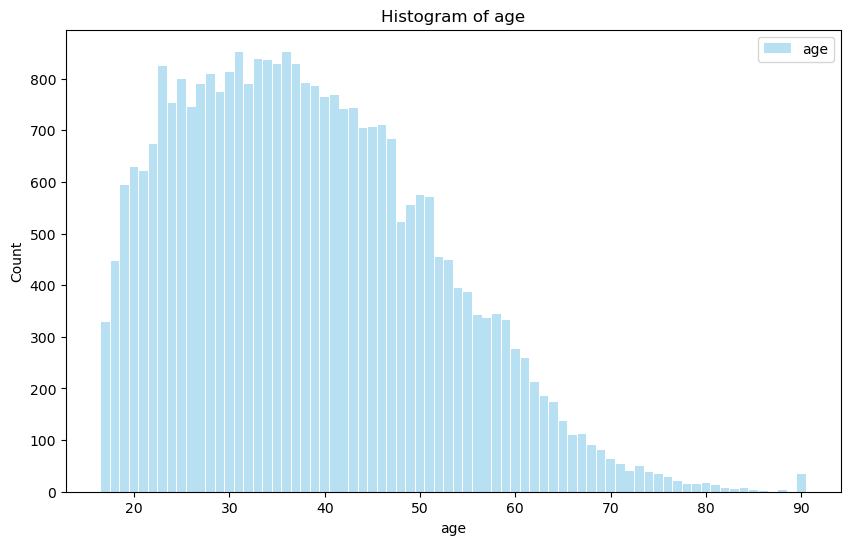

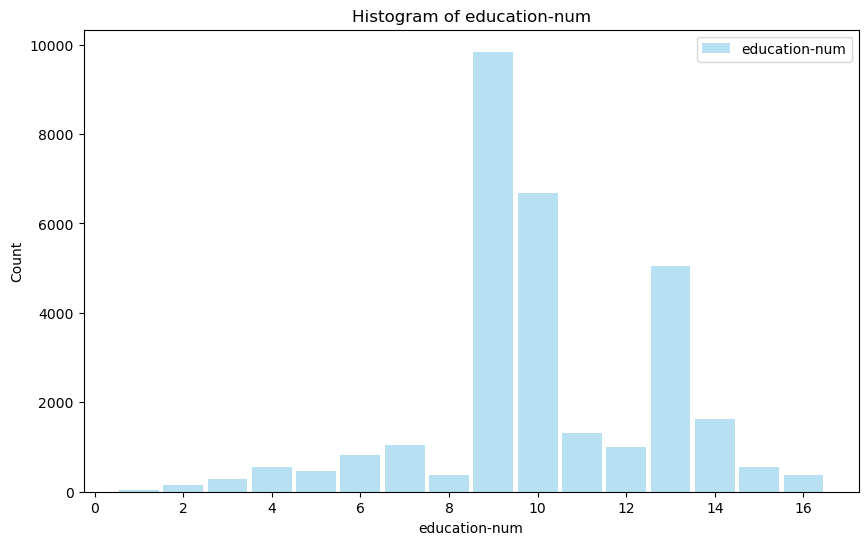

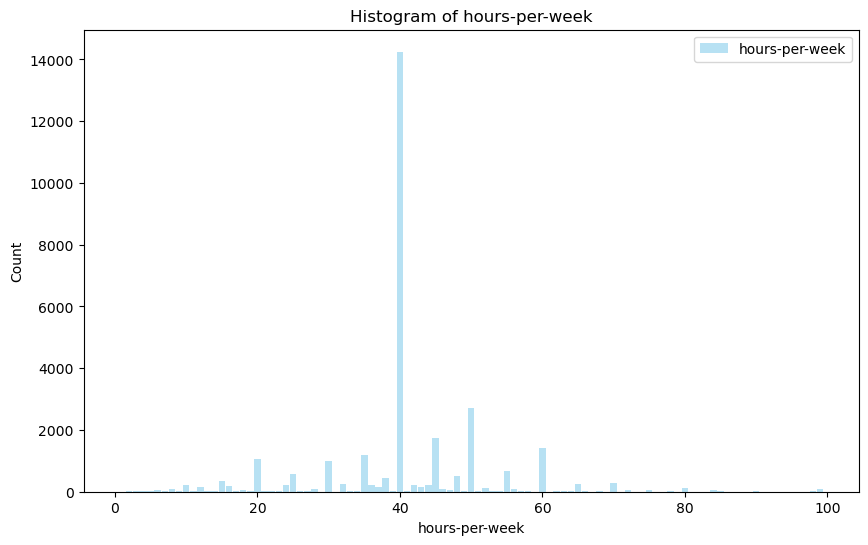

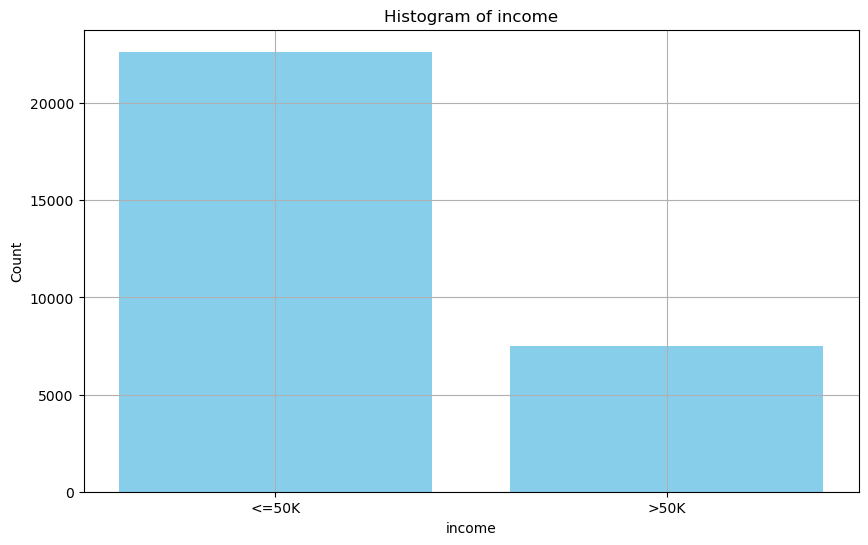

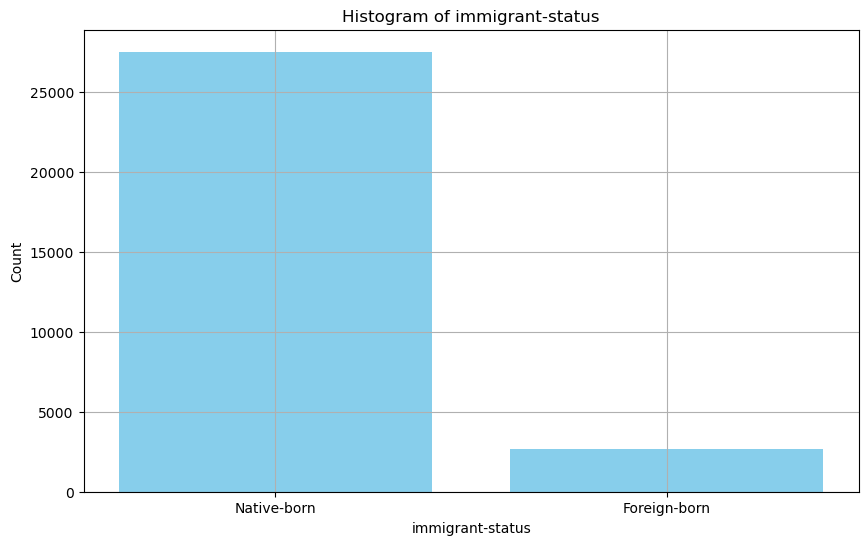

In [12]:
# Define a function to plot histograms 
def plot_histogram(df, column_name, bins=20, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    hist = thinkstats2.Hist(df[column_name], label=column_name)
    thinkplot.Hist(hist, color='skyblue')
    thinkplot.Config(xlabel=column_name, ylabel='Count', title=f'Histogram of {column_name}')
    plt.show()

# Plot histograms for each variable except income and immigrant-status
plot_histogram(df, 'age')
plot_histogram(df, 'education-num')
plot_histogram(df, 'hours-per-week')

# Define a function to plot a bar plot for categorical data
def plot_categorical_bar(df, column_name, labels, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    counts = df[column_name].value_counts().sort_index()
    plt.bar(labels, counts, color='skyblue')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Histogram of {column_name}')
    plt.grid(True)
    plt.show()

# Plot a bar plot for the income variable
plot_categorical_bar(df, 'income', labels=['<=50K', '>50K'])

# Plot a bar plot for the immigrant-status variable
plot_categorical_bar(df, 'immigrant-status', labels=['Native-born', 'Foreign-born'])

In [13]:
import thinkstats2
import thinkplot

In [14]:
hist = thinkstats2.Hist(df.age, label ='age')
for age, freq in hist.Smallest(10):
    print(age, freq)

17 328
18 447
19 594
20 629
21 621
22 674
23 824
24 752
25 799
26 745


In [15]:
for age, freq in hist.Largest(10):
    print(age, freq)

90 35
88 3
86 1
85 3
84 8
83 5
82 7
81 13
80 16
79 15


Since the FLSA sets 14 years old as the minimum age for employment and limits the number of hours worked by minors under the age of 16, retiring at the latest at 67, any age beyond 70 is considered an outlier. Therefore, any value that exceeds the range from 17 to 70 is deemed as an outlier.

The distribution of all three variables is approximately bell-shaped, resembling the shape of a normal distribution, but also exhibits asymmetry. Specifically:

Age has a tail that extends farther to the right.
Education-num has a tail that extends farther to the left.
Hours-per-week has a tail that extends farther to the right.

In [16]:
variables = ['age', 'education-num', 'hours-per-week', 'income', 'immigrant-status']

means = {}
modes = {}
spreads = {}

# Calculate mean, mode, and spread
for variable in variables:
    if df[variable].dtype in ['int64', 'float64']:  # Check if the column is numeric
        # Calculate mean
        means[variable] = df[variable].mean()
        
        # Calculate mode (select the first one if multiple modes exist)
        modes[variable] = df[variable].mode().iloc[0]
        
        # Calculate spread (standard deviation)
        spreads[variable] = df[variable].std()
    else:
        # Calculate mode for non-numeric columns
        modes[variable] = df[variable].mode().iloc[0]


print("Mean for each numeric variable:")
print(means)
print("\nMode for each variable:")
print(modes)
print("\nSpread (Standard Deviation) for each numeric variable:")
print(spreads)

Mean for each numeric variable:
{'age': 38.437901995888865, 'education-num': 10.12131158411246, 'hours-per-week': 40.93123798156621, 'immigrant-status': 0.08812412969962204}

Mode for each variable:
{'age': 36, 'education-num': 9, 'hours-per-week': 40, 'income': ' <=50K', 'immigrant-status': 0}

Spread (Standard Deviation) for each numeric variable:
{'age': 13.134664776856338, 'education-num': 2.549994918856753, 'hours-per-week': 11.979984229273281, 'immigrant-status': 0.28348003770067254}


#### Summary
- Age: The dataset has a diverse range of ages, centered around the late 30s.
- Education: Most individuals have completed a high school level of education, with some variation.
- Work Hours: The typical workweek is about 40 hours, but there is considerable variation, indicating the presence of both part-time and overtime workers.
- Income: Most individuals earn less than or equal to $50,000, suggesting a skew towards lower-income brackets.
- Immigrant Status: The majority are non-immigrants, with a small but significant portion of immigrants. 

### Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

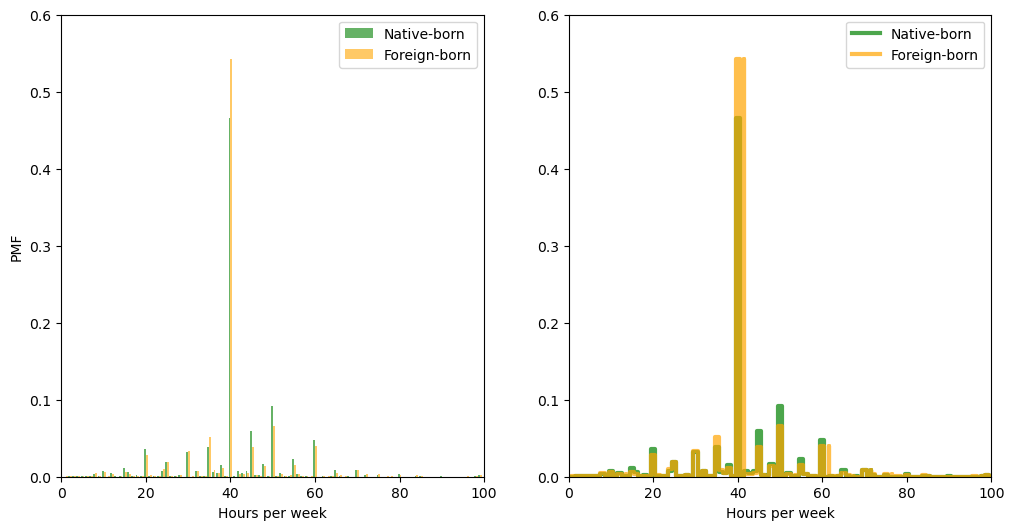

In [17]:
import thinkstats2
import thinkplot

def classify_immigrant_status(country):
    if country.strip() == 'United-States':
        return 'Native-born'  
    else:
        return 'Foreign-born'  

# Create a new column for immigrant status
df['immigrant-status'] = df['native-country'].apply(classify_immigrant_status)

# Compute PMF for 'Native-born' and 'Foreign-born' categories
native_born_pmf = thinkstats2.Pmf(df[df['immigrant-status'] == 'Native-born']['hours-per-week'])
foreign_born_pmf = thinkstats2.Pmf(df[df['immigrant-status'] == 'Foreign-born']['hours-per-week'])

native_born_color = 'green'
foreign_born_color = 'orange'

width = 0.45
axis = [0, 100, 0, 0.6]

# Plot PMFs using Hist
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(native_born_pmf, align="right", width=width, color=native_born_color, label='Native-born')  
thinkplot.Hist(foreign_born_pmf, align="left", width=width, color=foreign_born_color, label='Foreign-born') 
thinkplot.Config(xlabel="Hours per week", ylabel="PMF", axis=axis)

# Plot PMFs using Pmfs 
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmf(native_born_pmf, color=native_born_color, label='Native-born')
thinkplot.Pmf(foreign_born_pmf, color=foreign_born_color, label='Foreign-born')
thinkplot.Config(xlabel="Hours per week", axis=axis)


This illustrates that both native-born and foreign-born individuals most commonly work around 40 hours per week. However, the concentration of foreign-born individuals working exactly 40 hours is higher compared to native-born individuals. 

### Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

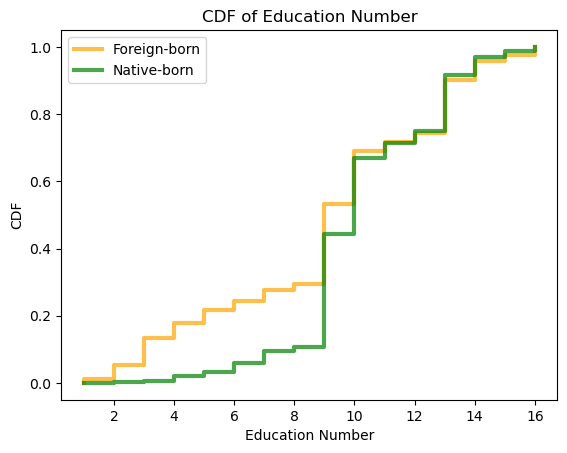

In [18]:
# Compute CDFs for 'education-num' variable for foreign-born and native-born individuals
data_foreign_born = df[df['immigrant-status'] == 'Foreign-born']['education-num']
data_native_born = df[df['immigrant-status'] == 'Native-born']['education-num']

cdf_foreign_born = thinkstats2.Cdf(data_foreign_born, label='Foreign-born')
cdf_native_born = thinkstats2.Cdf(data_native_born, label='Native-born')

# Plot the CDFs
thinkplot.Cdf(cdf_foreign_born, color='orange')
thinkplot.Cdf(cdf_native_born, color='green')
thinkplot.Config(xlabel='Education Number', ylabel='CDF', title='CDF of Education Number')



The CDF shows that the native-born population generally achieves higher educational levels compared to the foreign-born population. The CDF for the native-born is consistently higher, showing that a larger proportion of this group attains each educational level. This indicates disparities in educational outcomes based on nativity, likely influenced by various social, economic, and policy factors.

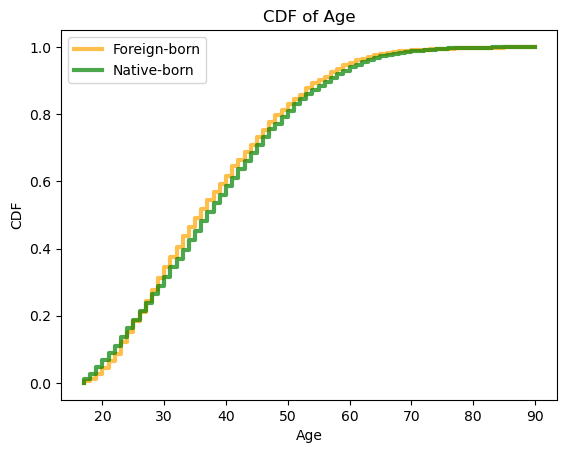

In [19]:
data_foreign_born = df[df['immigrant-status'] == 'Foreign-born']['age']
data_native_born = df[df['immigrant-status'] == 'Native-born']['age']


cdf_foreign_born = thinkstats2.Cdf(data_foreign_born, label='Foreign-born')
cdf_native_born = thinkstats2.Cdf(data_native_born, label='Native-born')

# Plot the CDFs
thinkplot.Cdf(cdf_foreign_born, color='orange')
thinkplot.Cdf(cdf_native_born, color='green')
thinkplot.Config(xlabel='Age', ylabel='CDF', title='CDF of Age')


### Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

Mean, Var: 38.25257104194858 155.01124169826795
Sigma: 12.45035106726987


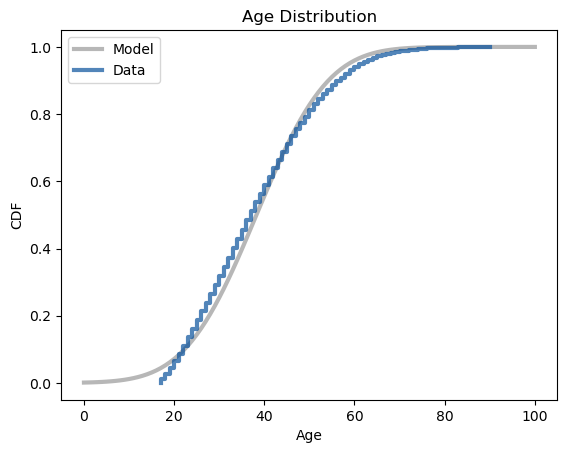

In [20]:
# Calculate the trimmed mean and variance for the 'age' variable
mu, var = thinkstats2.TrimmedMeanVar(df.age, p=0.01)
print("Mean, Var:", mu, var)

# Calculate the standard deviation
sigma = np.sqrt(var)
print("Sigma:", sigma)

# Generate the normal CDF
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=100)  # Adjust 'high' as needed based on the range of age values

# Plot the model
thinkplot.Plot(xs, ps, label="Model", color="0.6")

# Plot the empirical CDF of the age data
cdf = thinkstats2.Cdf(df.age, label="Data")

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title="Age Distribution", xlabel="Age", ylabel="CDF")


The analysis of the 'age' variable reveals that the average age in the dataset is approximately 38.25 years, with a standard deviation of around 12.45 years. In other words, the ages of the individuals in the dataset typically range from about 25.8 years to 50.7 years (38.25 years ± 12.45 years), with some variation outside this range. 

### Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).


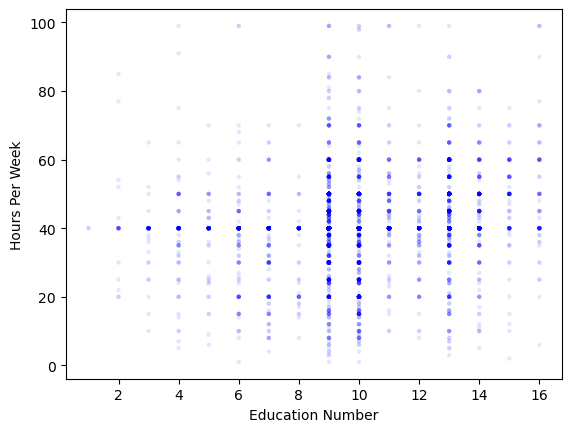

In [21]:
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

# Sample the DataFrame and extract education-num and hours-per-week
sample = SampleRows(df, 5000)
education_nums, hours_per_week = sample['education-num'], sample['hours-per-week']

# Scatter plot without jitter
thinkplot.Scatter(education_nums, hours_per_week, alpha=0.1, s=10)
thinkplot.Config(xlabel='Education Number',
                 ylabel='Hours Per Week',
                 legend=False)

The scatter plot shows a positive linear correlation between Education Number (x-axis) and Hours Per Week (y-axis). As Education Number increases, Hours Per Week tends to increase as well, but with significant variation and spread in the data points. There are potential outliers and clusters, suggesting the presence of additional influencing factors. While the relationship is positive, its strength appears moderate due to the data's spread. 

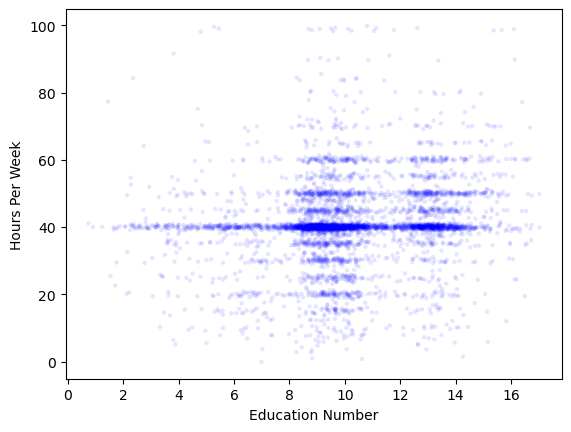

In [22]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

# Add jitter to the data
education_nums = Jitter(education_nums, 0.5)
hours_per_week = Jitter(hours_per_week, 0.5)

# Scatter plot with jitter
thinkplot.Scatter(education_nums, hours_per_week, alpha=0.1, s=10)
thinkplot.Config(xlabel='Education Number',
                 ylabel='Hours Per Week',
                 legend=False)

#### Data Points and Trend
The scatter plot shows a wide distribution of data points across different education levels and hours worked per week.
There is a noticeable concentration of data points around the middle range of education numbers (around 10 to 12), which corresponds to completing high school and some college education.
Most of the data points are clustered around 40 hours per week across various education levels, which is typical for a full-time job.
#### Correlation Analysis
The plot shows a slight positive correlation between the Education Number and Hours per Week. This suggests that individuals with higher education levels tend to work slightly more hours per week, although the correlation does not appear to be very strong.
The correlation could be quantified using Pearson’s correlation coefficient to determine the strength and direction of the linear relationship.
#### Covariance
A positive covariance would indicate that higher education levels are associated with more hours worked, which seems to be suggested by the plot.
#### Non-Linear Relationships
The relationship does not appear to be strictly linear, as the increase in hours per week is not consistent across all education levels. There might be a non-linear relationship or other factors influencing the number of hours worked that are not captured solely by education level.
#### Considerations on Causation
While there is a correlation observed, causation cannot be directly inferred. Higher education might lead to jobs that require or allow for more hours, but this is not a definitive conclusion from the scatter plot alone. Other factors such as industry, job role, and personal choice could also influence hours worked.
### Conclusion
The scatter plot suggests a mild positive correlation between education level and hours worked per week. However, the relationship is not strongly linear, and causation cannot be established from this plot alone. Further analysis with additional data and variables would be necessary to draw more concrete conclusions.

### Conduct a test on your hypothesis using one of the methods covered in Chapter 9.


In [29]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
def classify_immigrant_status(country):
    if country.strip() == 'United-States':
        return 'Native-born'  
    else:
        return 'Foreign-born'

# Strip any leading or trailing whitespace from column names and string columns
df.columns = df.columns.str.strip()
df['income'] = df['income'].astype(str).str.strip()

# Drop any rows with missing values in hours-per-week
df = df.dropna(subset=['hours-per-week'])

# Ensure hours-per-week is numeric
df['hours-per-week'] = pd.to_numeric(df['hours-per-week'], errors='coerce')
df = df.dropna(subset=['hours-per-week'])

# Classify immigrant status
df['immigrant-status'] = df['native-country'].apply(classify_immigrant_status)

# Separate the hours-per-week data into two groups based on immigrant status
hours_per_week_native = df[df['immigrant-status'] == 'Native-born']['hours-per-week']
hours_per_week_foreign = df[df['immigrant-status'] == 'Foreign-born']['hours-per-week']

# Prepare the data for the hypothesis test
data = (hours_per_week_native.values, hours_per_week_foreign.values)

# Perform the permutation test
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue


0.634


#### Hypothesis: 
There is a significant difference in the mean hours worked per week between native-born and foreign-born individuals.
#### Test: 
Permutation test for the difference in means.
#### Result: 
p-value = 0.064
#### Conclusion: 
The evidence is not strong enough to reject the null hypothesis at the 5% significance level, but the p-value is close to 0.05, indicating a potential trend. The result of the hypothesis test does not support the idea that foreign-born individuals are stealing jobs from native-born individuals.


### For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [24]:
df = pd.read_excel('/Users/linhhuynh/Desktop/DSC530/adult-training.xlsx')
education_num = df['education-num']
hours_per_week = df['hours-per-week']

def income_binary(income):
    if income.strip().lower() == '<=50k':
        return 0  # <=50k
    else:
        return 1  # >50k

# Create the income_binary variable
df['income_binary'] = df['income'].apply(income_binary)

# Save the modified DataFrame back to a CSV file
df.to_csv('data_with_income_binary.csv', index=False)


In [25]:
import statsmodels.formula.api as smf

formula = 'income_binary ~ age + education_num + hours_per_week'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          income_binary   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     2543.
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:29:26   Log-Likelihood:                -15109.
No. Observations:               32561   AIC:                         3.023e+04
Df Residuals:                   32557   BIC:                         3.026e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.7596      0.012    -64.898      0.000      -0.783      -0.737
age                0.0066      0.000     42.240      0.000       0.006       0.007
education_num      0.0502      0.001     59.891      0.000       0.049       0.052
hours_per_week     0.0059      0.000     33.713      0.000       0.006       0.006
==============================================================================
Omnibus:                     3403.949   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4036.798
Skew:                           0.830   Prob(JB):                         0.00
Kurtosis:                       2.534   Cond. No.                         320.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression model suggests that age, education level, and hours worked per week are statistically significant predictors of income level, with older individuals, those with higher education levels, and those working more hours per week being more likely to have an income greater than 50K. However, the model only explains a modest proportion of the variance in income level.

### Summary of Findings

The analysis of the dataset reveal insightful patterns in demographics and work behaviors, accoounting for age, education, and weekly working hours. On average, individuals are 38.44 years old, possess 10 years of education, and dedicate 40 hours per week to work, with immigrants comprising 8.8% of the sample. While mode values point to common trends, there's variability across these measures. Native-born individuals typically exhibit higher levels of education. A mild positive correlation between education and hours worked is apparent based on the analysis. A comparison between native-born and foreign-born individuals' weekly hours reveals no significant difference. Although age, education, and hours worked are predictors of income, they only explain a modest portion of the variance. This data does not support claims of foreign-born individuals displacing native-born workers. Other factors, such as job types and economic conditions, also play influential roles in employment dynamics. Extensive economic research underscores the complexity of immigration's effects on the labor market, suggesting that assertions of immigrants "stealing" jobs from natives oversimplify the situation. Immigrants frequently contribute to economic growth, address labor shortages, and complement the native workforce.

In the analysis, these variables could be added to enhance our understanding. Exploring employment rates could add further clarification to labor market dynamics between native-born individuals and immigrants across different demographic segments. Investigating occupational changes might reveal whether native workers experience displacement from certain professions due to immigrant competition. A detailed breakdown of employment by industry and occupation for both immigrant and native workers could highlight sectors most affected by immigration. Additionally, geographic data analysis could unveil localized effects of immigration patterns, discerning between urban and rural areas or regions with different immigration rates. Lastly, considering policy variables like changes in visa regulations or enforcement measures could contextualize shifts in employment patterns influenced by immigration policies. Integrating these variables could provide a more comprehensive perspective on immigration's complexities and its impact on the labor market.

In evaluating the analysis, several areas unveiled potential incorrect assumptions and challenges. Distinguishing between causality and correlation posed difficulties, given the complexity of establishing a direct link between immigration and native-born employment outcomes. It's vital to acknowledge that correlation doesn't imply causation, and unaccounted-for factors may influence employment patterns. Additionally, variations in the impact of immigration across different regions and industries complicated generalizations. The politically charged nature of immigration heightened the risk of public scrutiny or misinterpretation, potentially leading to controversy or backlash. Ethical considerations regarding the implications of the findings on perceptions of immigrant communities and policy decisions were crucial and necessitated careful deliberation. Addressing these challenges and assumptions is imperative to uphold the integrity and validity of the analysis.